<a href="https://colab.research.google.com/github/karsarobert/Machine_learning_2024/blob/main/08/PTE_ML8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A mesterséges intelligencia matematikai alapjai gyakorlat
# PTE Gépi tanulás

## 8. Gyakorlat: Support Vector Machines (támogató vektor gépek)
### 2024. április 9.

A támogató vektor gépek (SVM) a felügyelt algoritmusok egy különösen hatékony és rugalmas osztályozási és regressziós osztálya. Ebben a leckében a támogató vektor gépek mögötti intuíciót és az osztályozási problémákban való felhasználásukat fogjuk kifejteni.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



#Support Vector Machines (támogató vektor gépek)

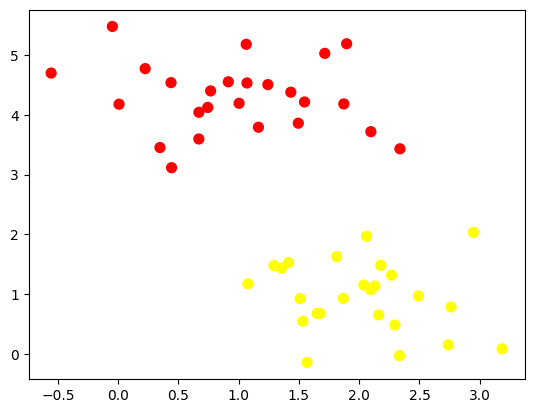

In [ ]:
from sklearn.datasets import make_blobs # minta adatok generálása
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60) # minták száma, központok (osztályok száma), a pontok szórása
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [ ]:
X.shape # 50 minta 2 feature

(50, 2)

In [ ]:
y # 2 osztályba tartoznak az adatok

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

Egy lineáris diszkriminatív osztályozó megpróbálna egy egyenes vonalat húzni a két adathalmazt elválasztó vonalra, és ezáltal létrehozni egy modellt az osztályozáshoz. Az itt bemutatotthoz hasonló kétdimenziós adatok esetében ezt a feladatot kézzel is el tudnánk végezni. De rögtön látjuk a problémát: több mint egy lehetséges választóvonal van, amely tökéletesen képes megkülönböztetni a két osztályt!

Ezeket a következőképpen rajzolhatjuk meg:


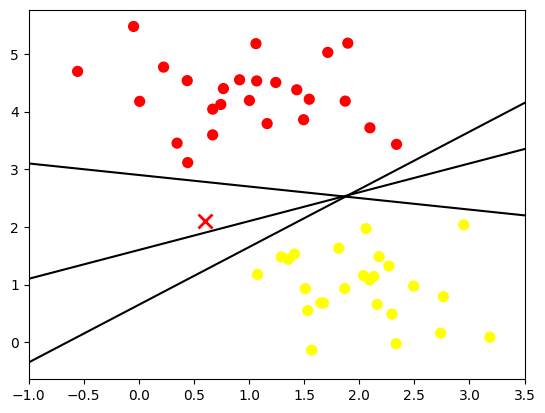

In [ ]:
xfit = np.linspace(-1, 3.5) # -1 és 3,5 között felveszünk 50 pontot (alapértelmezett mennyiség) az egyenesek rajzolásához kell
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # az elöbbi kódblokkban generált pontok rajzolása, s=50 marker mérete
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10) # piros x kirajzolása

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: # végig iterálunk a tuple-k (meredekség és metszet) listáján
    plt.plot(xfit, m * xfit + b, '-k') # egyenesek megrajzolása

plt.xlim(-1, 3.5); # X tengely beállítása

Ez három nagyon különböző szeparátor, amelyek azonban tökéletesen megkülönböztetik ezeket a mintákat. Attól függően, hogy melyiket választja, egy új adatpont (pl. az "X"-szel jelölt pont ezen a grafikonon) más-más címkét kap! Nyilvánvaló, hogy az egyszerű intuíciónk, hogy "vonalat húzunk az osztályok közé", nem elég, és egy kicsit mélyebben kell gondolkodnunk.

#Maximális margó
A támogató vektorgépek egy módot kínálnak ennek javítására. Az intuíció a következő: ahelyett, hogy egyszerűen egy nulla szélességű vonalat húznánk az osztályok közé, minden egyes vonal köré egy bizonyos szélességű margót húzhatunk, a legközelebbi pontig. Íme egy példa arra, hogy ez hogyan nézhet ki:

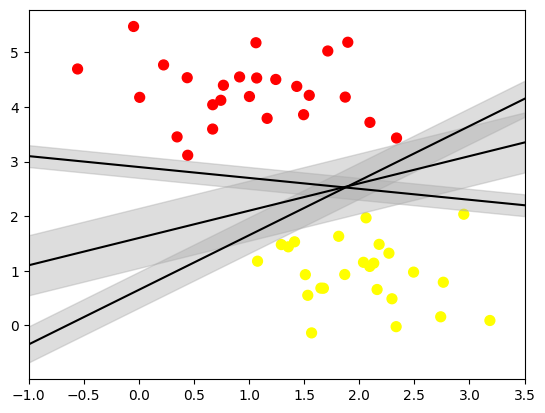

In [ ]:
xfit = np.linspace(-1, 3.5) # -1 és 3,5 között felveszünk 50 pontot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # pontok rajzolása, s=50 marker mérete

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: # az egyenesek adatai meredekség, metszet, margó szélessége
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k') # egyenesek megrajzolása -k: black a vonal színe
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', # margó rajzolása
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

A támogató vektoros gépeknél azt az egyenest választjuk optimális modellnek, amelyik maximalizálja ezt a margót.


Lássuk az adatokhoz való tényleges illesztés eredményét: a Scikit-Learn támogatási vektor osztályozóját fogjuk használni, hogy egy SVM modellt képezzünk ki az adatokra. Egyelőre lineáris kernelt fogunk használni, és a C paramétert nagyon nagy számra állítjuk (ezek jelentését rövidesen részletesebben is tárgyaljuk).

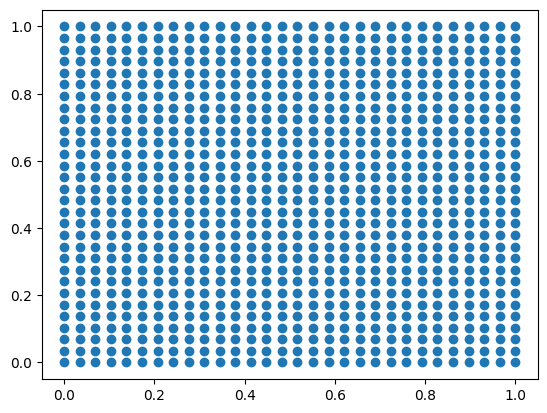

In [ ]:
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x) # https://www.geeksforgeeks.org/numpy-meshgrid-function/

ax.scatter(X,Y)

In [ ]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60) # minták száma, központok (osztályok száma), a pontok szórása

In [ ]:
from sklearn.svm import SVC # Support vector classifier
model = SVC(kernel='linear', C=10) # lineáris kernel C a modell szigorúsága válasszunk kisebb C értékeket pl 0.1-et is
model.fit(X, y) # modell illesztése

SVC(C=10, kernel='linear')

Ez a kódrészlet létrehoz egy rácsot a döntési függvény vizualizálásához. Ezután a modell döntési függvénye minden rács ponton kiértékelésre kerül, így a döntési határok kirajzolhatók lesznek.

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # rács létrehozása a modell értékeléséhez
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # döntés határai és margói
    ax.contourf(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

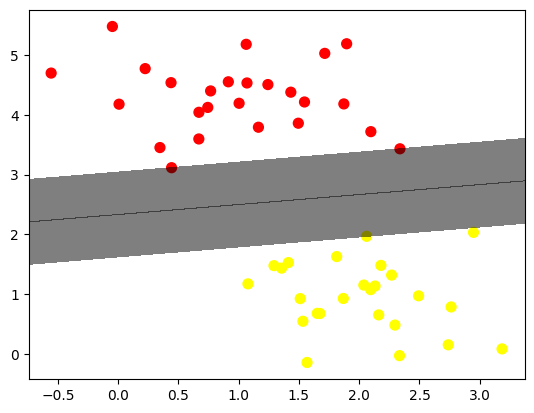

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Ez az a választóvonal, amely maximalizálja a két pontcsoport közötti távolságot. Vegyük észre, hogy a képzési pontok közül néhány pont éppen csak érinti a határvonalat: ezeket az ábrán fekete körök jelzik. Ezek a pontok az illesztés sarkalatos elemei, a támaszvektorok, amelyekről az algoritmus a nevét kapta. A Scikit-Learnben ezeknek a pontoknak az azonosságát az osztályozó support_vectors_ attribútumában tároljuk:


Text(0.5, 1.0, 'Döntési határ')

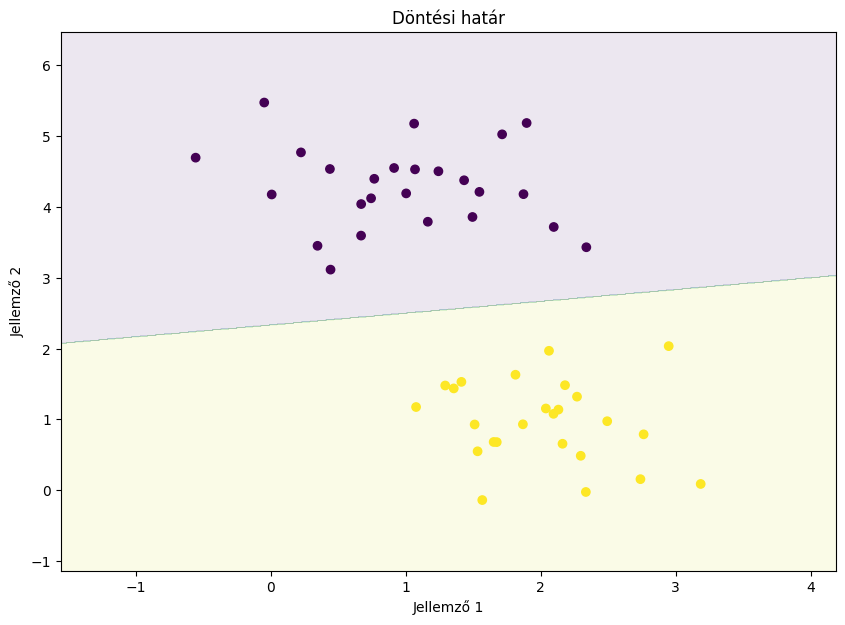

In [ ]:
arr1 = np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.01)
arr2 = np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.01)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = model.predict(input_array)

plt.figure(figsize =(10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 1)
plt.xlabel('Jellemző 1')
plt.ylabel('Jellemző 2')
plt.title('Döntési határ')

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Az osztályozó sikerének kulcsa, hogy az illesztés szempontjából csak a támaszvektorok pozíciója számít; a peremtől távolabb eső, de a helyes oldalon lévő pontok nem módosítják az illesztést! Technikailag ez azért van így, mert ezek a pontok nem járulnak hozzá a modell illesztéséhez használt veszteségfüggvényhez, így helyzetük és számuk nem számít, amíg nem lépik át a margót.

Ezt láthatjuk például, ha ábrázoljuk az adatkészlet első 60 pontjából és az első 120 pontjából tanult modellt:


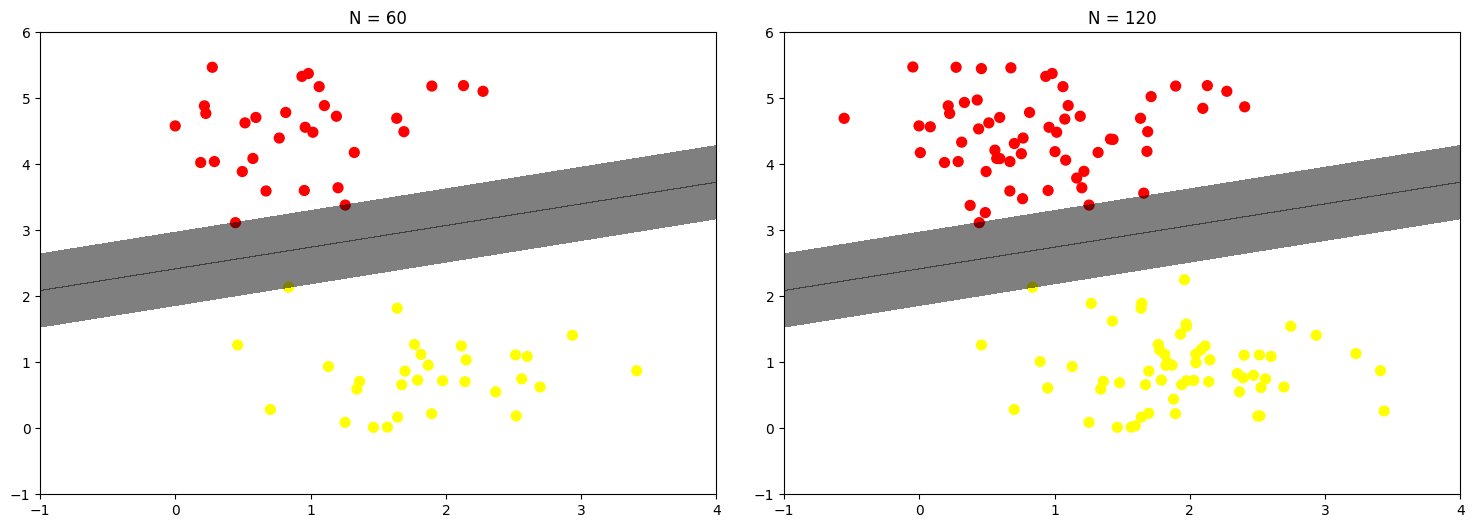

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

A bal oldali panelen a modell és a támogató vektorok láthatók 60 gyakorló ponthoz. A jobb oldali panelen megdupláztuk a képzési pontok számát, de a modell nem változott: a bal oldali panel három támogatóvektora még mindig a jobb oldali panel támogatóvektorai. Ez a távoli pontok pontos viselkedésére való érzéketlenség az SVM-modell egyik erőssége.

interactive(children=(Dropdown(description='N', options=(10, 100, 200), value=10), Output()), _dom_classes=('w…

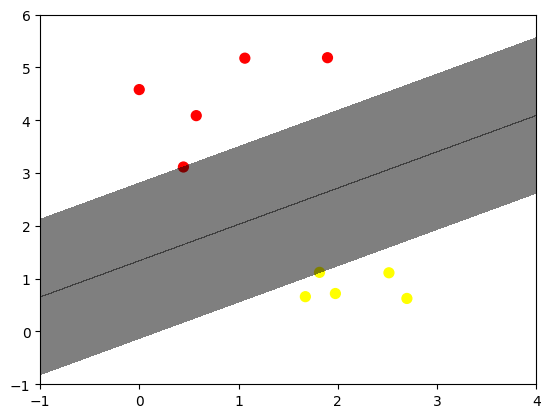

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 100, 200], ax=fixed(None));

#A lineáris határokon túl: Kernel SVM
Az SVM akkor válik rendkívül hatékonnyá, amikor kernelekkel kombináljuk. A kernelek egy változatát már láttuk korábban, a lineáris regressziónál. Ott az adatainkat polinomok által meghatározott magasabb dimenziós térbe vetítettük, és ezáltal lineáris osztályozóval nemlineáris összefüggésekre tudtunk illeszkedni.

Az SVM modellekben ugyanennek az ötletnek egy változatát használhatjuk. Hogy motiváljuk a kernelek szükségességét, nézzünk néhány olyan adatot, amely nem lineárisan szeparálható:

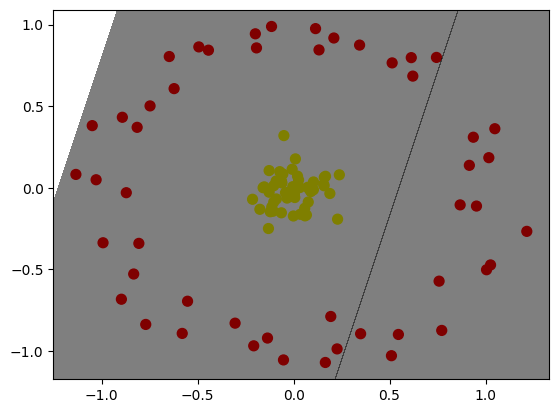

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

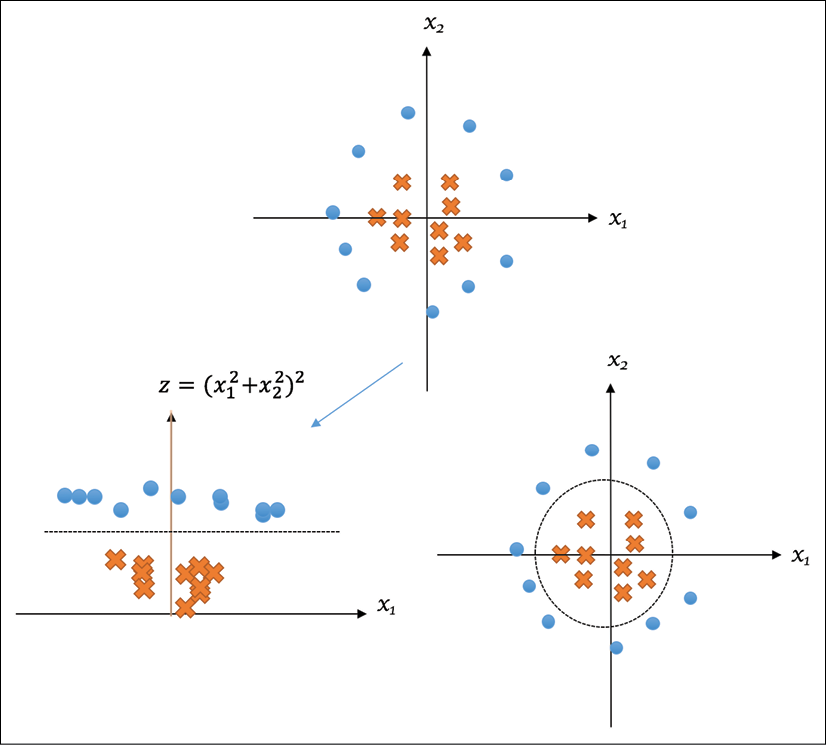

Egyértelmű, hogy semmilyen lineáris osztályozó nem lesz képes elkülöníteni ezeket az adatokat. Elgondolkodhatunk azon, hogyan vetíthetnénk az adatokat egy magasabb dimenzióba úgy, hogy egy lineáris szétválasztás elegendő legyen. Például egy egyszerű vetítés, amit használhatnánk, az lenne, hogy kiszámítunk egy radiális bázisfüggvényt, amelynek középpontja a középső csomó:

A radiális bázis függvény olyan alap függvény, melynek értéke bizonyos középponttól való távolságtól függ csupán.

In [ ]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', options=(-90, 90, 180), value=-90), IntSlider(value=30, des…

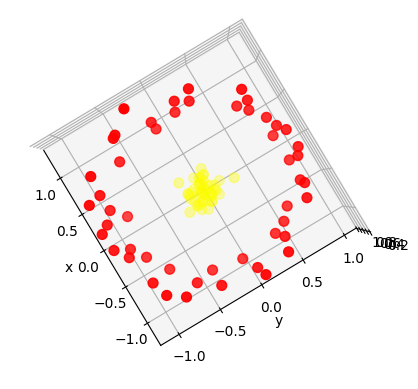

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90, 180], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

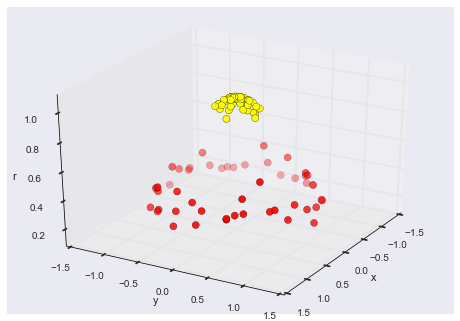

Láthatjuk, hogy ezzel a további dimenzióval az adatok triviálisan lineárisan szeparálhatóvá válnak, ha egy elválasztó síkot rajzolunk mondjuk r=0,7-nél.

Itt meg kellett választanunk és gondosan be kellett hangolnunk a vetítésünket: ha nem a megfelelő helyre központosítottuk volna a radiális bázisfüggvényünket, nem kaptunk volna ilyen tiszta, lineárisan elválasztható eredményeket. Általánosságban az ilyen választás szükségessége problémát jelent: szeretnénk valahogy automatikusan megtalálni a legjobb bázisfüggvényeket, amelyeket használhatunk.

Az egyik stratégia erre az, hogy kiszámítunk egy bázisfüggvényt, amelynek középpontja az adathalmaz minden pontja, és hagyjuk, hogy az SVM-algoritmus szitáljon az eredmények között. Az ilyen típusú bázisfüggvény-transzformációt kernel-transzformációnak nevezzük, mivel az egyes pontpárok közötti hasonlósági kapcsolaton (vagy kernelen) alapul.

Ennek a stratégiának - N pont N dimenzióba vetítése - az a potenciális problémája, hogy az N dimenzió növekedésével nagyon számításigényessé válhat. A kernel-trükk néven ismert ügyes kis eljárásnak köszönhetően azonban a kernel-transzformált adatokra való illesztés implicit módon is elvégezhető - azaz anélkül, hogy a kernel-projekció teljes N dimenziós reprezentációját valaha is meg kellene építeni! Ez a kernel-trükk az SVM-be van beépítve, és ez az egyik oka annak, hogy a módszer olyan erős.

A Scikit-Learnben a kernelizált SVM-et egyszerűen úgy alkalmazhatjuk, hogy a lineáris kernelünket RBF (radial basis function) kernelre cseréljük a kernelmodell hiperparaméterének használatával:

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

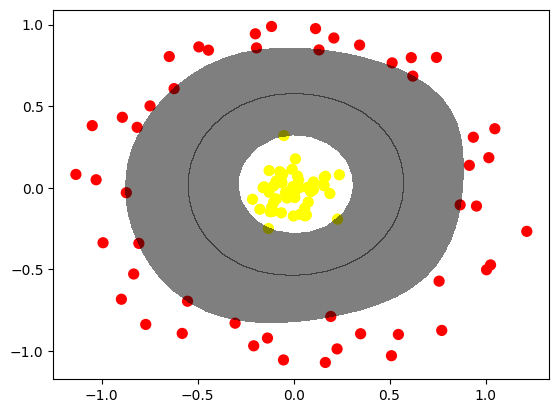

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Ezt a kernelizált támogató vektor gépet használva megtanulunk egy megfelelő nemlineáris döntési határt. Ezt a kernel-transzformációs stratégiát gyakran használják a gépi tanulásban, hogy a gyors lineáris módszereket gyors nemlineáris módszerekké alakítsák, különösen olyan modellek esetében, amelyekben a kernel-trükk használható.

#Az SVM hangolása: A margók lágyítása
Az eddigi eseteink a nagyon tiszta adathalmazok körül voltak, amelyekben tökéletes döntési határ létezik. De mi van akkor, ha az adatainkban van némi átfedés? Például ilyen adatai lehetnek:

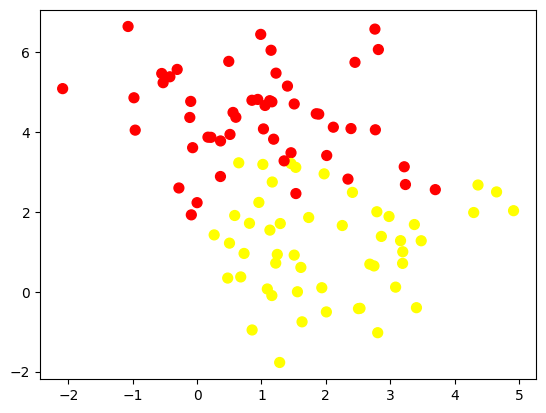

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Ennek az esetnek a kezelésére az SVM implementáció rendelkezik egy kis fudge-faktorral, amely "lágyítja" a margót: vagyis lehetővé teszi, hogy néhány pont bekússzon a margóra, ha ez jobb illeszkedést tesz lehetővé. A margó keménységét egy hangolási paraméter szabályozza, amelyet leggyakrabban C néven ismerünk. Nagyon nagy C esetén a margó kemény, és a pontok nem feküdhetnek bele. Kisebb C esetén a margó lágyabb, és egyes pontokat is magába foglalhat.

Az alábbi diagram szemléletesen mutatja be, hogy a C paraméter változása hogyan befolyásolja a végső illesztést a margó lágyulásán keresztül:

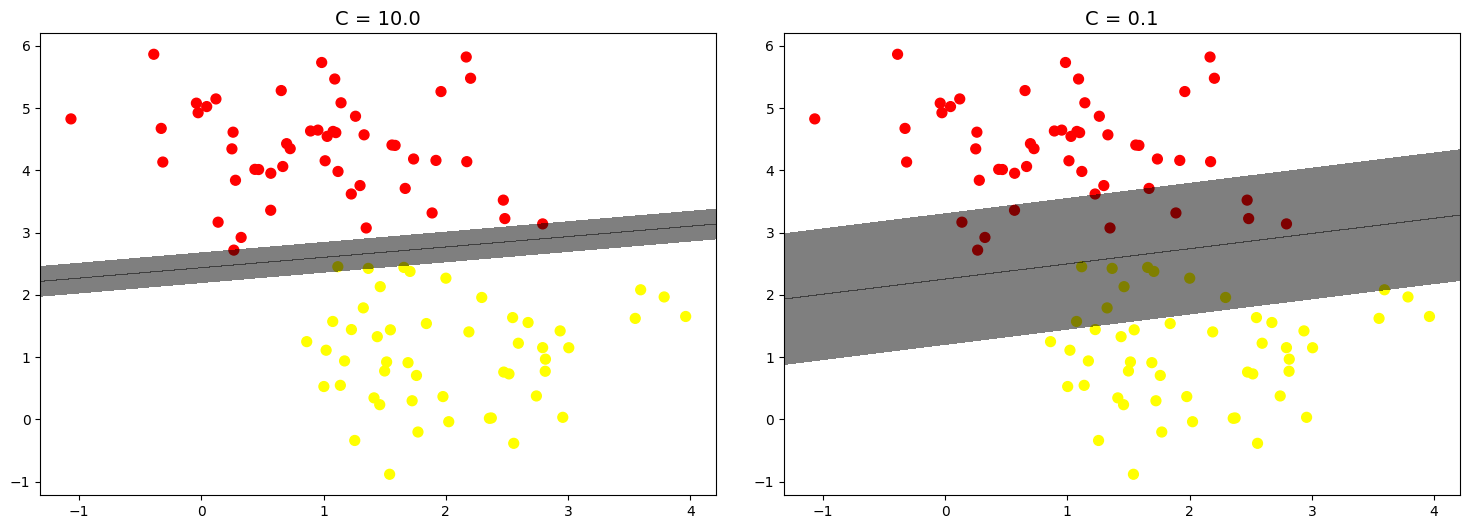

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [ ]:
from sklearn.datasets import fetch_lfw_people

face_data = fetch_lfw_people(min_faces_per_person=80)


## C és Gamma paraméterek

1. **C Paraméter**: A `C` paraméter a regularizációs erősséget szabályozza az SVC modellben. Ez a paraméter határozza meg, hogy mennyire engedjük meg a modellnek, hogy illeszkedjen az egyes adatpontokhoz. Magas `C` érték azt jelenti, hogy a modell alacsonyabb hibával próbál illeszkedni az adatra, ami növelheti a túlilleszkedés (overfitting) esélyét, mivel a modell túlságosan is próbálja megfelelni az összes adatpontnak. Alacsony `C` érték esetén a modell engedékenyebb a határterületen lévő pontokkal szemben, ami elősegítheti a jobb általánosítást, de növelheti a nem megfelelő illeszkedés (underfitting) kockázatát.

2. **Gamma Paraméter**: A `gamma` paraméter befolyásolja az egyes minták hatásának terjedését a döntési térben, amikor Gaussián (RBF) kernellel használjuk. Specifikusan, a `gamma` befolyásolja azt, hogy egy adott mintapont milyen messzire van hatással. Magas `gamma` érték esetén a minták hatássugara kicsi lesz, ami azt jelenti, hogy csak a legközelebbi pontok lesznek befolyással a döntési határra. Ez segíthet a modellnek nagyon bonyolult határvonalak létrehozásában, de szintén növelheti a túlilleszkedés kockázatát. Alacsony `gamma` érték esetén a minták nagyobb területre gyakorolnak befolyást, ami simább döntési határt eredményez és javíthatja a modell általánosíthatóságát, de túlságosan egyszerűsítheti a modellt.

A megfelelő `C` és `gamma` értékek megválasztása kritikus lépés egy SVC modell felépítésében, és gyakran keresztes validációval (cross-validation) vagy más hiperparaméter-optimalizálási technikákkal kerülnek kiválasztásra a legjobb modell teljesítmény érdekében.


Megfigyelhető, hogy a nagyobb gamma szűk régiókat eredményez, ami szigorúbb illeszkedést jelent az adathalmazra; a kisebb gamma tág régiókat eredményez, ami laza illeszkedést jelent az adatkészlethez. Természetesen  keresztellenőrzéssel finomhangolható a legjobb teljesítmény elérése érdekében.

![](https://slideplayer.com/slide/13588937/83/images/26/Gaussian+kernel+Gaussian+function+is+bell+curve+%3A.jpg)

#Gamma hiperparaméter
A Gamma hiperparaméter jól jön RBF vagy Poly kernel esetén. Nincs szerepe, ha a kernel lineáris. Tekintettel arra, hogy egy komplex függvényt szeretnénk megvalósítani, a Poly Kernelt fogom használni.

A Gamma lényegében egyetlen képzési pont befolyásának távolságát szabályozza.

A Gamma alacsony értékei nagy hasonlósági sugarat jeleznek, ami azt eredményezi, hogy több pont kerül csoportosításra.

A Gamma magas értékei esetén a pontoknak nagyon közel kell lenniük egymáshoz ahhoz, hogy ugyanabba a csoportba tartozzanak.

A gammaparaméter intuitív módon meghatározza, hogy meddig ér el egy-egy képzési példa hatása, ahol az alacsony értékek „távol”, a magas értékek pedig „közel” jelentik. A gammaparaméterek a modell által támasztóvektorként kiválasztott minták befolyási sugarának inverzeként tekinthetők.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [ ]:
matplotlib_axes_logger.setLevel('ERROR')
zero_one_colourmap_pts = ListedColormap(('red', 'green'))
zero_one_colourmap_boundary = ListedColormap(('#FFCCCB', '#90EE90'))
# függvény az osztályozó döntési határának ábrázolásához
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))
    plt.figure(figsize=(10,6))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                                X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75,
                cmap = zero_one_colourmap_boundary)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = (zero_one_colourmap_pts)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

# függvény SVM generálására különböző hiperparaméterekkel
def generate_clf(input_gamma, input_C=1):
    classifier = SVC(kernel="poly", gamma=input_gamma, C=input_C)
    classifier.fit(X, y.ravel())
    y_pred = classifier.predict(X)
    print("Training Accuracy = {}".format(accuracy_score(y_pred, y)))
    return classifier

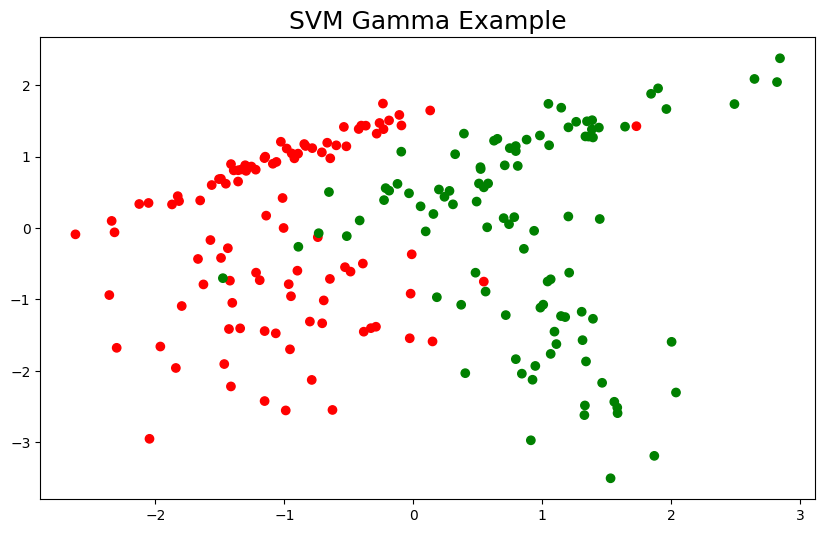

In [ ]:
X, y = make_classification(n_samples=200, n_features=2,
n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,random_state=44)
plt.figure(figsize=(10,6))
plt.title("SVM Gamma Example", fontsize=18)
plt.scatter(X[:,0], X[:,1], c=y, cmap=zero_one_colourmap_pts)

#Gamma = 0.001

Intuitív módon a gamma paraméter határozza meg, hogy milyen messzire terjed egy-egy képzési példa hatása, ahol az alacsony értékek "messzire", a magas értékek pedig "közelre" hatnak.

Training Accuracy = 0.505


<ipython-input-25-44bd81ba8e33>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


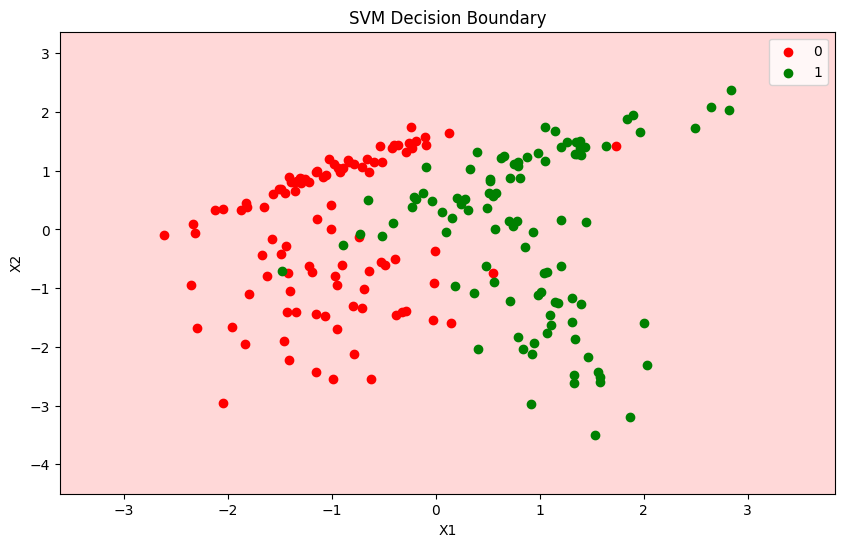

In [ ]:
classifier_1 = generate_clf(0.001)
plot_decision_boundary(X, y, classifier_1)

#Néhány megfigyelés
A modell nem túl pontos, mivel minden pontot a 0. osztályba sorol.
A modell pontossága 50%-os
A gammaérték nagyon alacsony, ami azt jelzi, hogy nagy a hasonlósági sugár, ami azt eredményezi, hogy több pont kerül egy csoportba.

#Gamma = 0.1

Training Accuracy = 0.795


<ipython-input-25-44bd81ba8e33>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


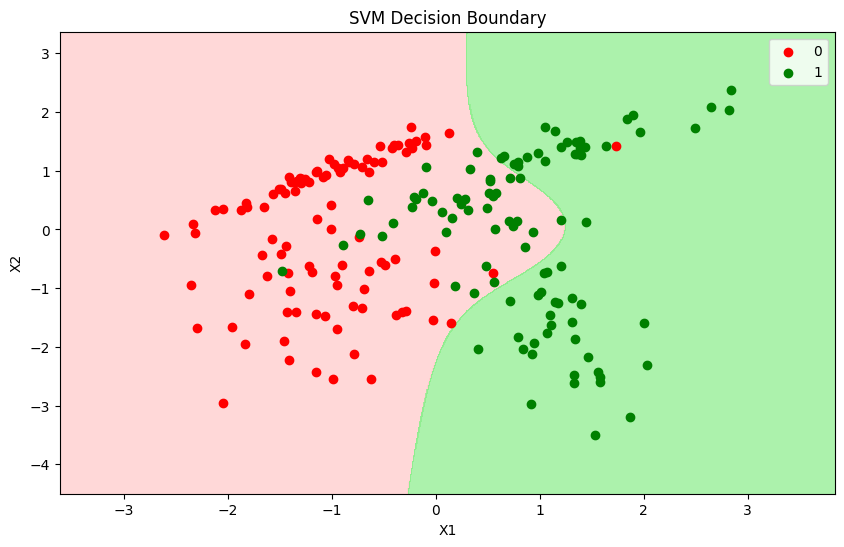

In [ ]:
classifier_2 = generate_clf(0.1)

plot_decision_boundary(X, y, classifier_2)

Néhány megfigyelés
A Gamma 0,001-ről 0,1-re való növelése után a modell pontossága 50%-ról 80%-ra nőtt.
A Gamma értékének növelése azt jelezte, hogy a hasonlósági sugár kicsi lett, ami a pontosságot növelte.

Magasabb gamma érték kisebb hatókörű kernelt eredményez, ami azt jelenti, hogy a klasszifikációt csak a legközelebbi adatpontok befolyásolják.

#Gamma = 1

Training Accuracy = 0.93


<ipython-input-25-44bd81ba8e33>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


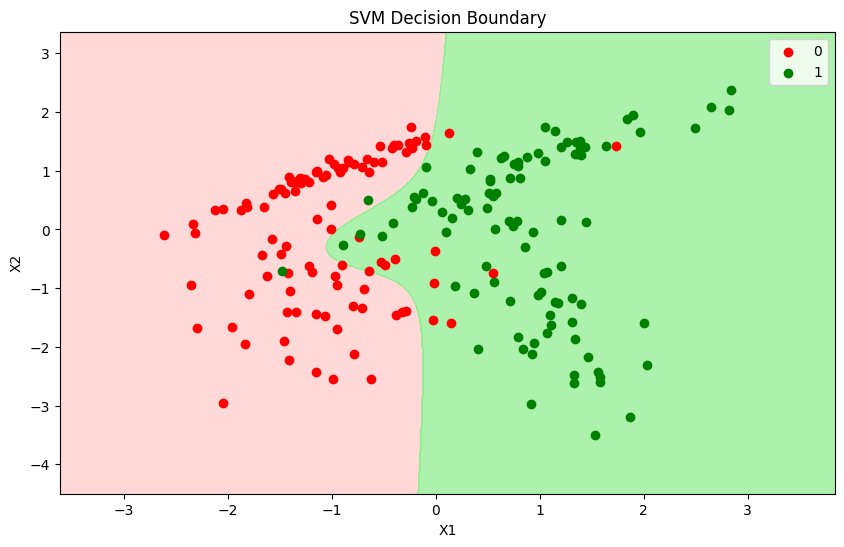

In [ ]:
classifier_3 = generate_clf(1)
plot_decision_boundary(X, y, classifier_3)

Néhány megfigyelés
A modell pontossága 93%-ra nőtt
Ahogy növeljük a Gamma értékét, a hasonlósági sugár folyamatosan csökkenti az egyes pontok befolyásának távolságát.

#Gamma = 0.1 & C = 0.1

Training Accuracy = 0.605


<ipython-input-25-44bd81ba8e33>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


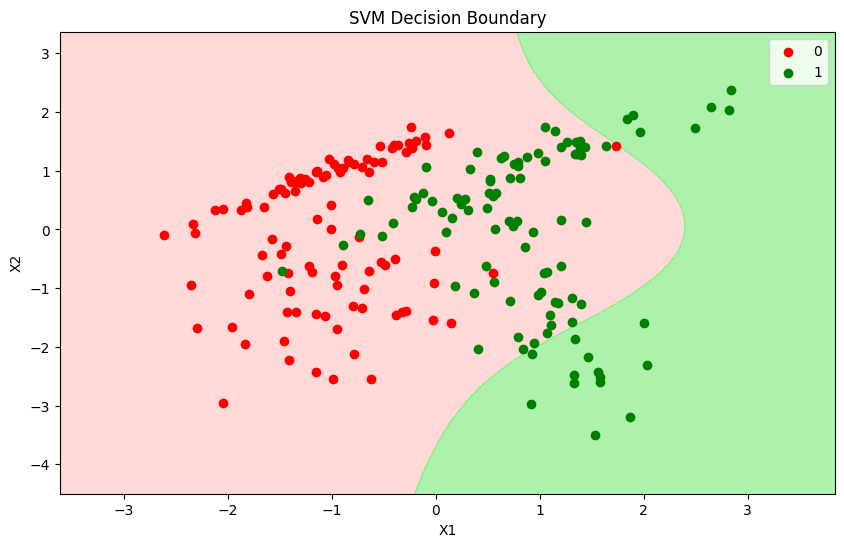

In [ ]:
classifier_4 = generate_clf(0.1, 0.1)
plot_decision_boundary(X, y, classifier_4)

Néhány megfigyelés
A Gamma értéket állandónak tartjuk, hogy figyelemmel kísérhessük a C kicsi, és a Gamma értéke 0,1
A modell 60%-os pontosságú.
Az ok egyszerű, kisebb a C érték, kisebb a téves osztályozás jelentősége, így kisebb a pontosság.

#Gamma = 0.1 & C = 1

Training Accuracy = 0.795


<ipython-input-25-44bd81ba8e33>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


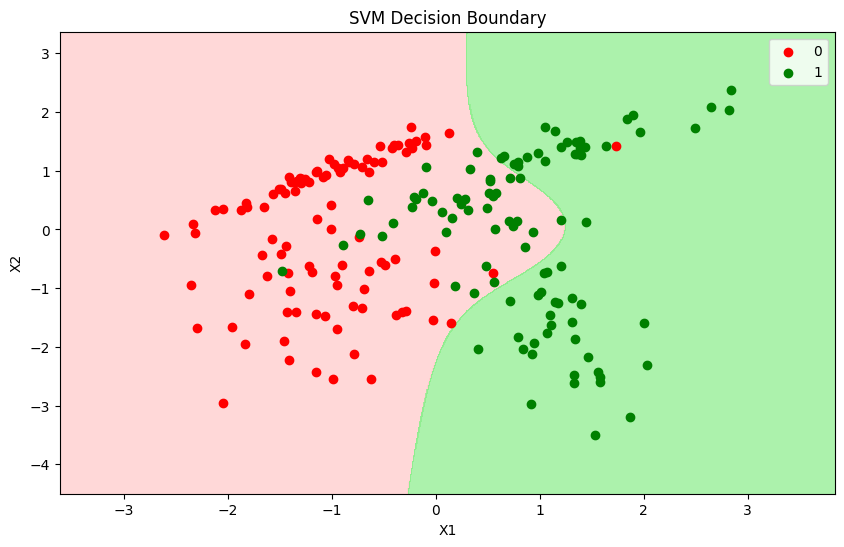

In [ ]:
classifier_5 = generate_clf(0.1, 1)
plot_decision_boundary(X, y, classifier_5)

Néhány megfigyelés
Ahogy a C értéket 1-re növeltük, nagyobb súlyt kaptak a hibásan besorolt pontok, így az algoritmus megpróbálta korrigálni azokat, ami egy 80%-os pontosságú modellt eredményezett.

#Gamma = 0.1 & C = 10

Training Accuracy = 0.94


<ipython-input-25-44bd81ba8e33>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


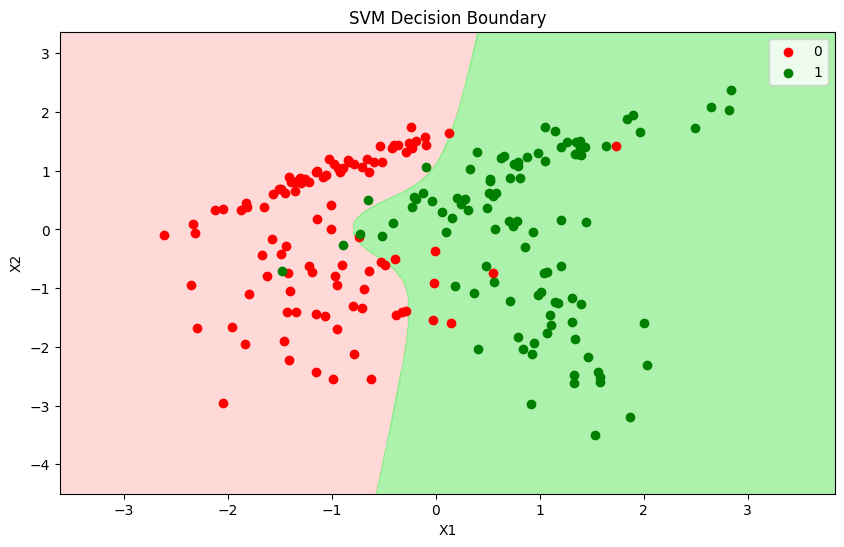

In [ ]:
classifier_6 = generate_clf(0.1, 10)
plot_decision_boundary(X, y, classifier_6)

Tegyük fel, hogy van egy adatkészletünk, amely két osztályba sorolható. Használhatunk SVC algoritmust az adatkészlet osztályozására. A C és a gamma paraméterek beállításával befolyásolhatjuk a modell pontosságát és komplexitását.

Ha magas C értéket és alacsony gamma értéket használunk, akkor a modell valószínűleg nagyon pontos lesz, de túltanulást is okozhat. Ez azt jelenti, hogy a modell jól fog teljesíteni a tanítási adatkészleten, de rosszul a teszt adatkészleten.
Ha alacsony C értéket és magas gamma értéket használunk, akkor a modell valószínűleg kevésbé pontos lesz, de nem fog túltanulni. Ez azt jelenti, hogy a modell jobban fog teljesíteni a teszt adatkészleten, de kevésbé lesz pontos a tanítási adatkészleten.

#Konkrét példa megvalósítása Breast cancer (mellrák) adatkészlettel

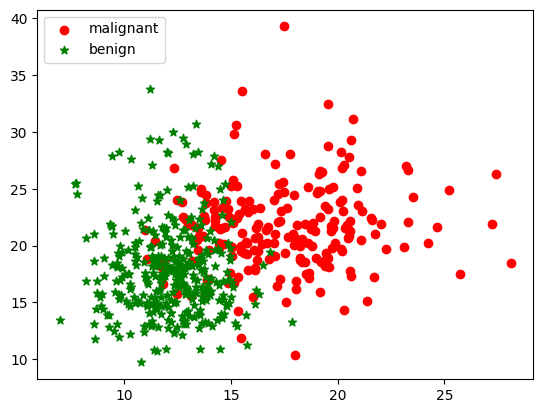

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

# Load the breast cancer dataset
#
df = pd.DataFrame(data=cancer_data.data)
df["label"] = cancer_data.target

# Scatter plot shown in fig 1
#
plt.scatter(df[0][df["label"] == 0], df[1][df["label"] == 0],
            color='red', marker='o', label='malignant')
plt.scatter(df[0][df["label"] == 1], df[1][df["label"] == 1],
            color='green', marker='*', label='benign')

plt.legend(loc='upper left')
plt.show()

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

X = cancer_data.data
Y = cancer_data.target # malignant (rossz indulatú), benign (jóindulatú)

print('Input data size :', X.shape) # bemeneti adatok alakja
print('Output data size :', Y.shape)
print('Feature names:', cancer_data.feature_names)
print('Label names:', cancer_data.target_names) # kimeneti adatokhoz tartozó cimkék
n_pos = (Y == 1).sum() # cimkék összesítése
n_neg = (Y == 0).sum() # cimkék összesítése
print(f'{n_pos} positive samples and {n_neg} negative samples.')


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)


from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1.0, random_state=42)
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')


Input data size : (569, 30)
Output data size : (569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Label names: ['malignant' 'benign']
357 positive samples and 212 negative samples.
The accuracy is: 95.1%


# Konkrét példa megvalósítása Fetal cardiotocography data (magzati kardiógrafikus adatok)


Dátum: a vizsga időpontja
b: kezdési időpont
e: a vizsgálat vége
LBE: kiindulási érték (orvosi szakértő)
LB: kiindulási érték (SisPorto)
AC: gyorsulások (SisPorto)
FM: magzati mozgás (SisPorto)
UC: méhösszehúzódások (SisPorto)
ASTV: az abnormális rövid távú változékonysággal töltött idő százalékos aránya (SisPorto).
mSTV: a rövid távú variabilitás középértéke (SisPorto)
ALTV: az abnormális hosszú távú változékonysággal töltött idő százalékos aránya (SisPorto)
mLTV: a hosszú távú változékonyság középértéke (SisPorto)
DL: enyhe lassulások
DS: súlyos lassulások
DP: hosszan tartó lassulások
DR: ismétlődő lassulások
Szélesség: hisztogram szélessége
Min: a hisztogram alacsony frekvenciája
Max: a hisztogram magas frekvenciája
Nmax: a hisztogram csúcsok száma
Nzeros: a hisztogram nulláinak száma
Mode: hisztogram mód
Mean: hisztogram átlaga
Medián: a hisztogram mediánja
Variancia: hisztogram szórása
Tendencia: a hisztogram tendenciája: -1=baloldali asszimetrikus; 0=szimmetrikus; 1=jobboldali asszimetrikus.
A: nyugodt alvás
B: REM alvás
C: nyugodt éberség
D: aktív éberség
SH: váltásmintázat (A vagy felfüggesztés váltásokkal)
AD: gyorsító/lassító mintázat (stresszhelyzet)
DE: lassító mintázat (vagális stimuláció)
LD: nagymértékben lassító mintázat
FS: lapos-szinuszos mintázat (kóros állapot)
SUSP: gyanús mintázat
CLASS: osztálykód (1-10) az A-tól SUSP-ig terjedő osztályok esetében.
NSP:- Normál=1; gyanús=2; kóros=3

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rames4498/cardiotocography-classifications/master/CTG.csv', header=0)

df.drop(['CLASS'],  axis=1, inplace = True)
X = df.drop(['NSP'], axis = 1)
y = df.NSP # Normal=1; Suspect=2; Pathologic=3

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
svc = SVC(kernel='rbf')

parameters = {'C': (100, 1e3, 1e4, 1e5),
              'gamma': (1e-08, 1e-7, 1e-6, 1e-5)
              }
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

svc_best = grid_search.best_estimator_

accuracy = svc_best.score(X_test, y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

prediction = svc_best.predict(X_test)

from sklearn.metrics import classification_report

report = classification_report(y_test, prediction) # macro avg az osztályok értékeinek átlaga, a súlyozott figyelembe veszi az osztályba tartozó elemszámot is
print(report)

{'C': 100000.0, 'gamma': 1e-05}
0.9041176470588235
The accuracy is: 89.2%
              precision    recall  f1-score   support

           1       0.95      0.92      0.93       333
           2       0.64      0.77      0.70        64
           3       0.93      0.86      0.89        29

    accuracy                           0.89       426
   macro avg       0.84      0.85      0.84       426
weighted avg       0.90      0.89      0.90       426



In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

Text(0.5, 0, 'Permutation Importance')

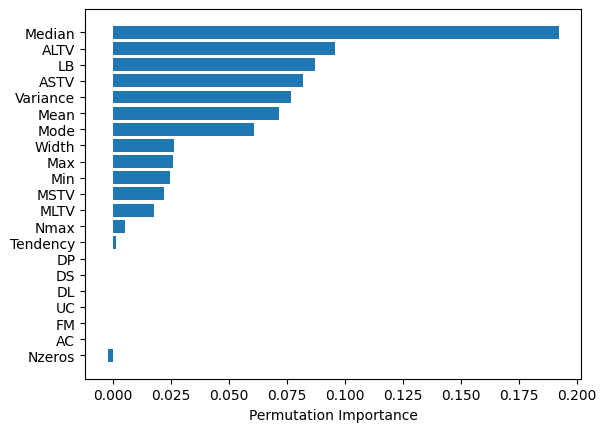

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

perm_importance = permutation_importance(svc_best, X_test, y_test) # feature importance

feature_names = X.columns.to_list()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

# Képek osztályozása SVM segítségével

In [ ]:
from sklearn.datasets import fetch_lfw_people # képek importálása

face_data = fetch_lfw_people(min_faces_per_person=80)

X = face_data.data
Y = face_data.target

print('Input data size :', X.shape) # 62*47-es felbontású képek
print('Output data size :', Y.shape)
print('Label names:', face_data.target_names) # képek cimkéi

for i in range(5):
    print(f'Class {i} has {(Y == i).sum()} samples.') # az egyes osztályok elemszámainak kiiratása

Input data size : (1140, 2914)
Output data size : (1140,)
Label names: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
Class 0 has 236 samples.
Class 1 has 121 samples.
Class 2 has 530 samples.
Class 3 has 109 samples.
Class 4 has 144 samples.


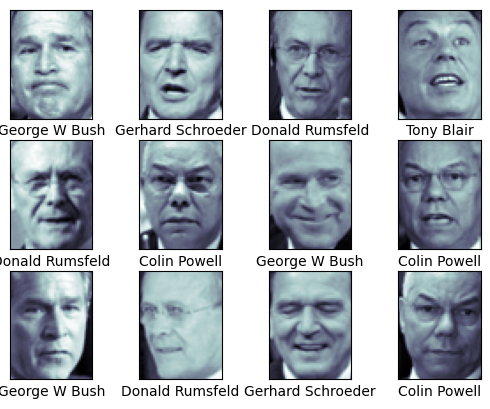

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4) # 12 db kép kirajzolása
for i, axi in enumerate(ax.flat):
    axi.imshow(face_data.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=face_data.target_names[face_data.target[i]])

plt.show()

A legtöbb gépi tanulási algoritmus azt feltételezi, hogy az adatok egyenletesen oszlanak el az osztályokon belül. Osztálykiegyensúlyozatlansági problémák esetén a kiterjedt probléma az, hogy az algoritmus inkább a többségi osztály előrejelzésére fog irányulni. Az algoritmusnak nem lesz elegendő adata ahhoz, hogy megtanulja a kisebbségi osztályban jelen lévő mintákat.
Ha létrehozunk egy buta modellt, amely minden új edzési adatot a többségi osztályba sorol, akkor is nagyon nagy pontosságot kapunk, mivel a modell a többségi osztály felé torzít. Itt a modell nagyon pontos, de egyáltalán nem szolgál a problémafelvetésünkhöz. Ezért az f1 pontszámot fogjuk használni értékelési mérőszámként. Az F1 pontszám nem más, mint a pontosság és a visszahívás harmonikus közepe. Az értékelési mérőszámot azonban az üzleti probléma és az alapján választjuk ki, hogy milyen típusú hibát szeretnénk csökkenteni.
##Az f1 pontszám a legjobb mérőszám, amikor az osztálykiegyensúlyozatlanságról van szó.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

from sklearn.svm import SVC
clf = SVC(class_weight='balanced', random_state=42) # úgy súlyozza az osztályokat, hogy a többségi osztály ne torzítsa a pontosságot


from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 1, 10],
              'gamma': [1e-07, 1e-08, 1e-06],
              'kernel' : ['rbf', 'linear'] }

In [ ]:
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)

grid_search.fit(X_train, Y_train)

print('The best model:\n', grid_search.best_params_)

print('The best averaged performance:', grid_search.best_score_)

clf_best = grid_search.best_estimator_

print(f'The accuracy is: {clf_best.score(X_test, Y_test)*100:.1f}%')

pred = clf_best.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, pred, target_names=face_data.target_names))

The best model:
 {'C': 1, 'gamma': 1e-07, 'kernel': 'linear'}
The best averaged performance: 0.8304093567251462
The accuracy is: 87.7%
                   precision    recall  f1-score   support

     Colin Powell       0.89      0.88      0.88        64
  Donald Rumsfeld       0.89      0.78      0.83        32
    George W Bush       0.87      0.91      0.89       127
Gerhard Schroeder       0.89      0.86      0.88        29
       Tony Blair       0.88      0.85      0.86        33

         accuracy                           0.88       285
        macro avg       0.88      0.86      0.87       285
     weighted avg       0.88      0.88      0.88       285



Support Vector Machine algoritmusok nem léptékezési változatlanok, ezért erősen ajánlott az adatok méretezése (pl. standardizálás)
Ajánlott kezdeti paraméterek

0,0001 < gamma < 10

0,1 < c < 100

Néhány megfigyelés
A C érték 10-re való növelése nagyobb hangsúlyt fektetett a téves osztályozásra, így pontosabb modellt eredményezett.

#Házi feladat
A BAF3A adatkészleten véletlen erdők, SVC segítségével jelezze előre a ClassValue-t. A modell építés során használjon keresztvalidálást és hiperparaméter hangolást (n_estimators, max_depth paraméterekkel) és az SVC esetén (C, gamma, kernel) a GridSearchCV segítségével! BAF3A fúrás adatok, ahol a kőzet típusát kell előre jelezni fizikai paraméterek alapján.

Adatok:
https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/BAF3A.csv

X = df.drop(['ClassName', 'ClassValue'], axis=1) # 'ClassName', 'ClassValue' oszlopok nem kellenek az X-be

y = df['ClassValue'] # y csak a ClassValue kerüljön ide

Vannak hiányzó adatok is!

Határidő április 16!